In [1]:

from src.returnAnalysis import *
from src.returnAnalysis import hyp_annual_return_is

from src.best_fit import *

path_csv      = "../ativos/"
arq_Ibov_csv  = "IBOV_InfoMoney.csv"
arq_Totus_csv = "TOTS3_InfoMoney.csv"
arq_Totus_pkl = "ibov_tots3.pkl"

<img align="left" width="100" height="100" src="LogoUNB.jpg">

<h3><div style="text-align:center">UNB - Universidade de Brasília <br>
Programa  de Pós-Graduação em Computação Aplicada <br>
Análise Estatística de Dados e Informações - AEID
</h3> 

<h3><div style="text-align:center">
Lista de exercícios 01 </h3> 

<h5><div style="text-align:left">
Alunos: <br>
    Amilton Lobo - 20/0094921<br>
    Tiago Pereira Vidal - 20/0095773<br>
    Weisner Calafiori Resende - 20/0095781<br>
    </h5> 
<br>
<div style="text-align:right"> 
Brasília, 29 de março de 2021

<div style="text-align:left"> 
<b>1ª Avaliação (valor 4 pontos): </b><br> <br> 
    Neste exercício o Grupo deve selecionar o preço de um ativo de 
    qualquer setor, além do ativo IBOVESPA. O grupo deve escolher estes ativos na B3 (preço de fechamento diário) no período de tempo de, aproximadamente, 1 ano (iniciando na data de 16/março/2020 até o dia do levantamento dos dados do grupo) selecionando o ativo de um dos seguintes setores:<br>
1)	Bancário;<br> 
2)	Turismo;<br> 
3)	Alimentação;<br> 
4)	Mineração;<br>
5)	Petróleo e Petroquímica;<br>
6)	Agronegócio;<br>
7)	Logística;<br>
8)	Bebidas;<br>
9)	Farmacêutico;<br>
10)	Construção Civil ou<br>
11)	Outros setores específicos (apresentar sugestão ao Professor).<br>
<br>
O ativo selecionado foi o TOTS3, do setor de tecnologia.

<b>a)	Inicialmente achem o retorno do ativo e do IBOVESPA com a seguinte fórmula de retorno contínuo: Ln (Pt/Pt-1).</b>


In [2]:
# Preparing IBOV dataframe
ibov = pd.read_csv(path_csv + arq_Ibov_csv, usecols=["DATA", "FECHAMENTO"])
ibov.columns = ["date", "ibov"]

# Preparing TOTS3 dataframe
tots3 = pd.read_csv(path_csv + arq_Totus_csv, usecols=["DATA", "FECHAMENTO"], decimal=',')
tots3.columns = ["date", "tots3"]

# Merge and format correction
dfTotus = pd.merge(ibov, tots3, on="date")
dfTotus['date'] = pd.to_datetime(dfTotus['date'], format="%d/%m/%Y")
dfTotus.sort_values(by=['date'])

dfTotus.index.name = 'indice'  

# Salva df
dfTotus.to_pickle(path_csv + arq_Totus_pkl)

print( dfTotus.head(10) )
print()
print( dfTotus.tail(10) )

             date     ibov  tots3
indice                           
0      2021-03-05  115.202  30.12
1      2021-03-04  112.690  30.61
2      2021-03-03  111.184  30.93
3      2021-03-02  111.540  31.02
4      2021-03-01  110.335  31.48
5      2021-02-26  110.035  31.38
6      2021-02-25  112.358  31.85
7      2021-02-24  115.668  33.13
8      2021-02-23  115.227  33.52
9      2021-02-22  112.668  33.49

             date    ibov  tots3
indice                          
231    2020-03-27  73.429  15.00
232    2020-03-26  77.710  17.53
233    2020-03-25  74.956  18.13
234    2020-03-24  69.729  15.13
235    2020-03-23  63.570  14.41
236    2020-03-20  67.069  14.41
237    2020-03-19  68.332  13.88
238    2020-03-18  66.895  14.13
239    2020-03-17  74.617  16.69
240    2020-03-16  71.168  16.32


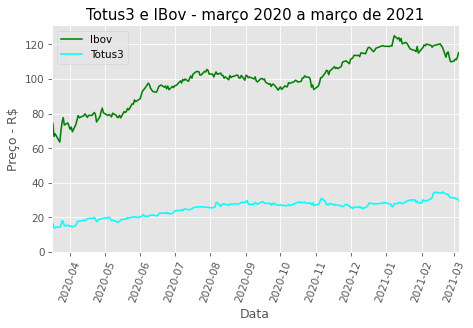

In [3]:
%matplotlib inline 
#esta linha dispensa que se insira plt.show. Basta plt.plot() para traçar o gráfico.

plt.rcParams['figure.figsize'] = (7,4)  #Figsize define o tamanho da figura no qual o eixo será inserido
plt.rcParams['figure.dpi']     = (75)   # dpi é o ponto por polegada (pixel por polegada).

plt.xticks(rotation=70)

# Definição da linha verde
x = dfTotus['date']
y = dfTotus['ibov']
plt.plot(x, y, color='green', label='Ibov')

# Definição da linha cyan 
y = dfTotus['tots3']
plt.plot(x, y, color='cyan', label='Totus3')


# definição de parâmetros do eixo cartesiano
y_max = int( max(dfTotus['ibov'].max(),dfTotus['tots3'].max()) * 1.05 )
plt.axis([dfTotus['date'].min(), dfTotus['date'].max(), # valores mínimos e máximos do eixos X
         0, y_max ])                                    # valores mínimos e máximos do eixos Y   
plt.title('Totus3 e IBov - março 2020 a março de 2021')  # texto a ser exibido como título do gráfico
plt.xlabel('Data') # texto a ser exibido no eixo X
plt.ylabel('Preço - R$') # texto a ser exibido no eixo Y
plt.grid(True)       # desenha um grid 
plt.legend()         # insere as legendas definidas anteriormente no comando plot

plt.show() 
# salva a figura do gráfico. A extensão do arquivo pode ser alterada: jpg, gif, png...
#plt.savefig("Grafico.png", dpi=100)  não funcionou



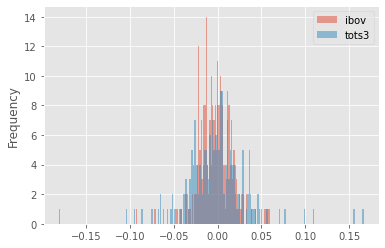

In [4]:
%matplotlib inline 
log_ret = generate_log_return(dfTotus)
log_ret.plot.hist(alpha=0.5, bins=len(log_ret))
log_ret.plot

<b>b)	Faça a Estatística Descritiva dos Dados de retorno (medidas: média, mediana, moda, quartis, assimetria, curtose, variância, desvio padrão e gráfico de linha - temporal e da distribuição de probabilidade).</b>

In [ ]:

######  ignorar por hora esta célula. Talvez a use se eu criar tabela e não DF para exibir a estatística

#from __future__ import absolute_import
#from IPython.core.getipython import get_ipython
#from IPython.core.magic import (Magics, magics_class,  cell_magic)
#
#@magics_class
#class MarkdownMagics(Magics):
#
#    @cell_magic
#    def markdown(self, line, cell):
#        from IPython.core.display import HTML
#        from markdown import markdown
#
#        vars = line.split()
#
#        d = {}
#        for k, v in self.shell.user_ns.items():
#            if k in vars:
#                d[k] = v
#
#        return HTML("<p>{}</p>".format(markdown(cell.format(**d))))
#
#get_ipython().register_magics(MarkdownMagics)


In [11]:
indice  = ['media','mediana','moda','quartil_25','quartil_50','quartil_75','assimetria',
           'curtose','variância','desv_padrao']
colunas = ['ibov','tots3']
dfEstDesc = pd.DataFrame(index = indice, columns = colunas)

dfEstDesc.loc[ "media"      ]['ibov' ] = log_ret['ibov' ].mean()
dfEstDesc.loc[ "media"      ]['tots3'] = log_ret['tots3'].mean()
dfEstDesc.loc[ "mediana"    ]['ibov' ] = log_ret['ibov' ].median()
dfEstDesc.loc[ "mediana"    ]['tots3'] = log_ret['tots3'].median()
dfEstDesc.loc[ "moda"       ]['ibov' ] = st.mode(log_ret['ibov' ])[0][0]
dfEstDesc.loc[ "moda"       ]['tots3'] = st.mode(log_ret['tots3'])[0][0]
dfEstDesc.loc[ "quartil_25" ]['ibov' ] = log_ret['ibov' ].quantile(0.25)
dfEstDesc.loc[ "quartil_25" ]['tots3'] = log_ret['tots3'].quantile(0.25)
dfEstDesc.loc[ "quartil_50" ]['ibov' ] = log_ret['ibov' ].quantile(0.50)
dfEstDesc.loc[ "quartil_50" ]['tots3'] = log_ret['tots3'].quantile(0.50)
dfEstDesc.loc[ "quartil_75" ]['ibov' ] = log_ret['ibov' ].quantile(0.75)
dfEstDesc.loc[ "quartil_75" ]['tots3'] = log_ret['tots3'].quantile(0.75)
dfEstDesc.loc[ "assimetria" ]['ibov' ] = log_ret['ibov' ].skew()
dfEstDesc.loc[ "assimetria" ]['tots3'] = log_ret['tots3'].skew()
dfEstDesc.loc[ "curtose"    ]['ibov' ] = log_ret['ibov' ].kurtosis()
dfEstDesc.loc[ "curtose"    ]['tots3'] = log_ret['tots3'].kurtosis()
dfEstDesc.loc[ "variância"  ]['ibov' ] = log_ret['ibov' ].var()
dfEstDesc.loc[ "variância"  ]['tots3'] = log_ret['tots3'].var()
dfEstDesc.loc[ "desv_padrao"]['ibov' ] = log_ret['ibov' ].std()
dfEstDesc.loc[ "desv_padrao"]['tots3'] = log_ret['tots3'].std()

dfEstDesc

,ibov,tots3
media,-0.001999,-0.002543
mediana,-0.001726,-0.002331
moda,-0.092475,0.0
quartil_25,-0.013748,-0.018223
quartil_50,-0.001726,-0.002331
quartil_75,0.010592,0.011703
assimetria,0.324037,0.26778
curtose,4.864792,7.403071
variância,0.00043,0.001138
desv_padrao,0.020736,0.033735


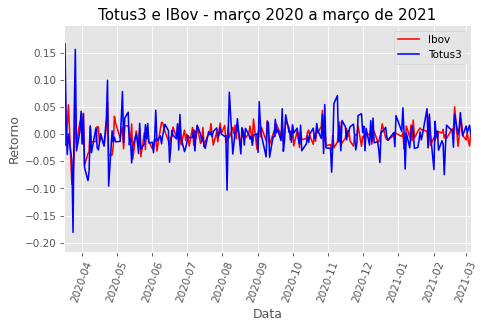

In [12]:
%matplotlib inline 
#esta linha dispensa que se insira plt.show. Basta plt.plot() para traçar o gráfico.

plt.rcParams['figure.figsize'] = (7,4)  #Figsize define o tamanho da figura no qual o eixo será inserido
plt.rcParams['figure.dpi']     = (75)   # dpi é o ponto por polegada (pixel por polegada).

plt.xticks(rotation=70)

# Definição da linha vermelha 
x = dfTotus['date']
y = log_ret['ibov']
plt.plot(x, y, color='red', label='Ibov')

# Definição da linha azul 
y = log_ret['tots3']
plt.plot(x, y, color='blue', label='Totus3')  

# definição de parâmetros do eixo cartesiano
y_max = max(log_ret['ibov'].max(),log_ret['tots3'].max()) * 1.2
y_min = min(log_ret['ibov'].min(),log_ret['tots3'].min()) * 1.2
plt.axis([dfTotus['date'].min(), dfTotus['date'].max(), # valores mínimos e máximos do eixos X
          y_min, y_max ])                               # valores mínimos e máximos do eixos Y

plt.title('Totus3 e IBov - março 2020 a março de 2021')  # texto a ser exibido como título do gráfico
plt.xlabel('Data')    # texto a ser exibido no eixo X
plt.ylabel('Retorno') # texto a ser exibido no eixo Y
plt.grid(True)        # desenha um grid 
plt.legend()          # insere as legendas definidas anteriormente no comando plot

plt.show() 

<b>c)	O objetivo é encontrar, pelo Risk Simulator ou Excel, a distribuição de melhor ajuste para a base de Dados do retorno do ativo. </b>


Text(0, 0.5, 'Frequency')

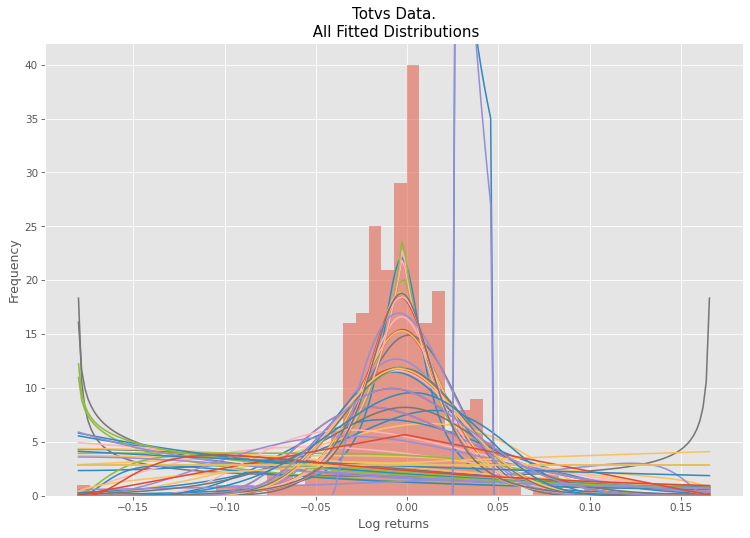

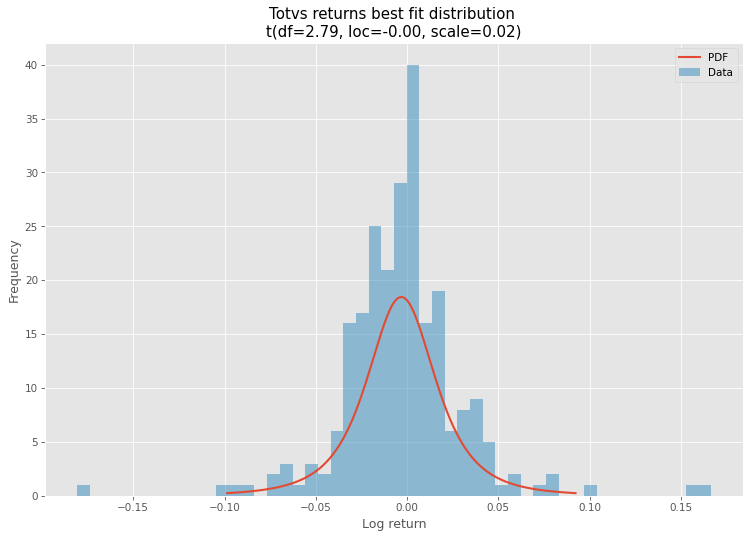

In [13]:
from src.best_fit import best_fit_distribution

# Load data from statsmodels datasets
data = log_ret['tots3'] #pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, alpha=0.5)#, normed=True, alpha=0.5)#, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Totvs Data.\n All Fitted Distributions')
ax.set_xlabel(u'Log returns')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)

#data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
data.plot(kind='hist', bins=50, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Totvs returns best fit distribution \n' + dist_str)
ax.set_xlabel(u'Log return')
ax.set_ylabel('Frequency')


<b>d)	Independentemente deste resultado o grupo fará uma Simulação pela Distribuição Normal do retorno do ativo, </b>


<AxesSubplot:>

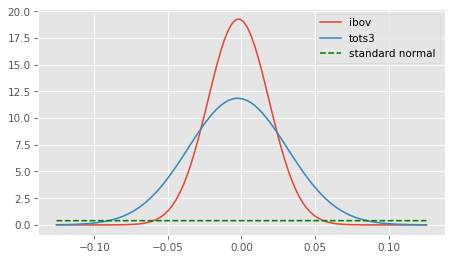

In [15]:
# ptrim = 0.01: Shows the "entire" normal distribution
# ptrim = 0.45: Shows the assets distribution much better
ptrim = 0.45
x_axis = np.linspace(st.norm.ppf(ptrim), st.norm.ppf(1-ptrim), 100)
dist = normal_simulation(log_ret, ptrim)
fig_dist, ax_dist = plt.subplots()
ax_dist.plot(x_axis, dist)
ax_dist.plot(x_axis, st.norm.pdf(x_axis), 'g--')
ax_dist.legend(["ibov", "tots3", "standard normal"])
ax_dist


<b>e)	Posteriormente o grupo fará o IC (95%) para a distribuição dos retornos. </b>


IC 95%:
 - IBOV:  (-0.042556053799410735, 0.03855900956676229)
 - TOTS3: (-0.06852386992925785, 0.0634384089052269)


<AxesSubplot:>

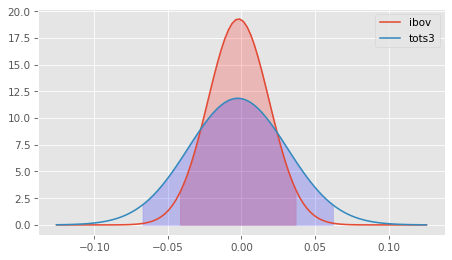

In [17]:
ibov_ci = confidence_interval(log_ret["ibov"], 0.95)
tots3_ci = confidence_interval(log_ret["tots3"], 0.95)
print("IC 95%:")
print(" - IBOV: ", ibov_ci)
print(" - TOTS3:", tots3_ci)
fig_ci, ax_ci = plt.subplots()
ax_ci.plot(x_axis, dist)
ax_ci.legend(["ibov", "tots3"])
ax_ci.fill_between(x_axis, dist['ibov'], 0, where=(x_axis>ibov_ci[0]) & (x_axis<ibov_ci[1]), color='r', alpha=0.2)
ax_ci.fill_between(x_axis, dist['tots3'], 0, where=(x_axis>tots3_ci[0]) & (x_axis<tots3_ci[1]), color='b', alpha=0.2)
ax_ci


<b>f)	Após o IC o grupo fará o teste (com α = 99%) de Hipóteses com retorno de 0,1 ou 10% em relação a média da Distribuição. Isto é, calculada a média e o desvio-padrão do retorno do ativo naquele período, o grupo testará a hipótese de que o valor de 10% de retorno é, significativamente igual a média de retorno do ativo escolhido.</b>


In [5]:
print("Return 10% (alpha = 99%):", hyp_annual_return_is(log_ret["tots3"], 0.1, 0.01))

Return 10% (alpha = 99%): True


<div style="text-align:left"> 
<b>2ª Avaliação (valor 6 pontos): </b><br> <br> 
Após o cálculo da análise da questão 1 acima, 

<b>a)	o grupo vai fazer uma Regressão Simples, considerando os retornos do ativo escolhido como variável dependente (variável Y da regressão) e o retorno do IBOVESPA (como variável X da regressão). Faça o gráfico das observações originais com a reta estimada.</b>

In [5]:
resultado = train_linear_model(log_ret[['ibov']],log_ret[['tots3']])
model = resultado[3]
log_ret['predict'] = model.predict(log_ret[['ibov']])

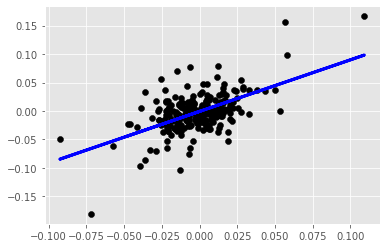

In [8]:
plt.scatter(log_ret['ibov'], log_ret['tots3'],  color='black')
plt.plot(log_ret['ibov'], log_ret['predict'], color='blue', linewidth=3)

<b>b)	Desta forma, deve-se fazer a Análise de Variância e os testes de hipóteses dos parâmetros β0 e β1. Sobre os resultados o que o grupo conclui? </b>
<br>
<br>
Conforme observado abaixo, o valor de t para B1 nos permite concluir que há relação entre os ativos da TOTS3 e IBOV. Já em relação ao B0, aceita-se a hipótese nula, logo a reta de regressão passa pela origem.

In [9]:
get_anova(log_ret[['ibov']],log_ret[['tots3']])


                            OLS Regression Results                            
Dep. Variable:                  tots3   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     107.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.56e-21
Time:                        17:22:36   Log-Likelihood:                 520.16
No. Observations:                 241   AIC:                            -1036.
Df Residuals:                     239   BIC:                            -1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.402      0.6

<b>c)	Avalie a estacionaridade, raiz unitária, heterocedasticidade e autocrrelação dos resíduos da série do ativo escolhido. Desta maneira, corrija e/ou faça sugestão do que se deve fazer para corrigir os problemas da série.  </b>